In [1]:
import numpy as np
import pandas as pd
import os.path as op
import matplotlib.pyplot as plt

In [2]:
z_cuts_upstream   = ['-.08', '-.08', '-.08', '-.08', '-.08', '-.09', '-.09' , '-.09' , '-.095', '-.095', '-.095' , '-.095' , '-.1'   ,  '-.1'  , '-.1'   , '-.1'   , '-.1'   , '-.105' , '-.105' ]
z_cuts_downstream = ['.1'  , '.1'  , '.1'  , '.1'  , '.1'  , '.1'  , '.1'   , '.1'   , '.1'   , '.1'   , '.1'    , '.1'    , '.105'  , '.105'  , '.105'  , '.105'  , '.105'  , '.11'   , '.11'   ]

kin = 0
kin_string = '0'

target = "He3"

raw_location = "../../../../../data/pass2_raw/"

regen = False

cerdf_path = "cer_dfs/"
caldf_path = "cal_dfs/"
nopid_path = "nopid_dfs/"

In [3]:
cut = 'T2==1 & nTracks==1 & W2>3.0'

ki = 0
if kin==16:
    ki = 11
elif kin<=5:
    ki = kin
else:
    ki = ((kin-5)/2)+5

cut = cut + ' & Z>' + z_cuts_upstream[ki] + ' & Z<' + z_cuts_downstream[ki] + ' & dnew_rate>0.0'

tph = "Phi"
tth = "Theta"
acc = ''
if kin!=16:
    acc = '(' + tph + ' + (1.1*' + tth + '))>-0.077'
    acc = acc + ' & (' + tph + ' + (3.3*' + tth + '))>-0.198'
    acc = acc + ' & (' + tph + ' - (3.3*' + tth + '))<0.198'
    acc = acc + ' & (' + tph + ' - (1.1*' + tth + '))<0.077'
    acc = acc + ' & (' + tph + ' + (1.1*' + tth + '))<0.088'
    acc = acc + ' & (' + tph + ' + (3.3*' + tth + '))<0.231'
    acc = acc + ' & (' + tph + ' - (3.3*' + tth + '))>-0.231'
    acc = acc + ' & (' + tph + ' - (1.1*' + tth + '))>-0.088'
    acc = acc + ' & ' + tph + ' < 0.033'
    acc = acc + ' & ' + tph + ' > -0.033'
    acc = acc + ' & dp>-0.035'
    acc = acc + ' & dp<0.045'
else:
    acc = '((0.015*' + tph + ')-(0.037*' + tth + '))<0.00222'
    acc = acc + ' & ' + tph + '<0.037'
    acc = acc + ' & (' + tph + '+(14*' + tth + '))<0.877'
    acc = acc + ' & ' + tph + '>-0.033'
    acc = acc + ' & (' + tph + '+(6.6*' + tth + '))>-0.396'
    acc = acc + ' & dp>-0.03'
    acc = acc + ' & dp<0.045'
    acc = acc + ' & ((0.16*FPx)-(0.95*FPth))<0.0325'
    acc = acc + ' & ((0.155*FPx)-(0.95*FPth))>-0.027'
    acc = acc + ' & FPx<0.5'
    acc = acc + ' & FPx>-0.45'

cut = cut + ' & ' + acc

cercut = cut + ' & (((Preshower + Shower)/Momentum)/1000.)>0.7'

calcut = cut
if kin==16:
    calcut = calcut + ' & Cherenkov>2000'
else:
    calcut = calcut + ' & Cherenkov>1500'

In [4]:
cerdf_list = []
cerdata = pd.DataFrame()

if op.isfile(cerdf_path+target+kin_string+".csv") and not regen:
    cerdata = pd.read_csv(cerdf_path+target+kin_string+".csv")
else:
    try:
        with open("../runlists/"+target+"_kin"+kin_string+".dat","r") as f:
            runs = f.read().splitlines()

            for run in runs:
                #print(run)
                run_events = pd.read_csv(raw_location + run + ".csv")
                run_events = run_events.replace([np.inf, -np.inf, np.nan, -np.nan], 0)

                cerdf_list.append((run_events.query(cercut))[['Cherenkov']])
                #cleaned.head()

    except FileNotFoundError:
        print("File Doesn't exist. Skipping Kinematic.")

    cerdata = pd.concat(cerdf_list, ignore_index=True)
    cerdata.to_csv(cerdf_path+target+kin_string+".csv")

In [5]:
caldf_list = []
caldata = pd.DataFrame()

if op.isfile(caldf_path+target+kin_string+".csv") and not regen:
    caldata = pd.read_csv(caldf_path+target+kin_string+".csv")
else:
    try:
        with open("../runlists/"+target+"_kin"+kin_string+".dat","r") as f:
            runs = f.read().splitlines()

            for run in runs:
                #print(run)
                run_events = pd.read_csv(raw_location + run + ".csv")
                run_events = run_events.replace([np.inf, -np.inf, np.nan, -np.nan], 0)

                caldf_list.append((run_events.query(calcut))[['Preshower','Shower','Momentum']])
                #cleaned.head()

    except FileNotFoundError:
        print("File Doesn't exist. Skipping Kinematic.")

    caldata = pd.concat(caldf_list, ignore_index=True)
    caldata.to_csv(caldf_path+target+kin_string+".csv")

In [6]:
nopid_list = []
nopiddata = pd.DataFrame()

if op.isfile(nopid_path+target+kin_string+".csv") and not regen:
    nopiddata = pd.read_csv(nopid_path+target+kin_string+".csv")
else:
    try:
        with open("../runlists/"+target+"_kin"+kin_string+".dat","r") as f:
            runs = f.read().splitlines()

            for run in runs:
                #print(run)
                run_events = pd.read_csv(raw_location + run + ".csv")
                run_events = run_events.replace([np.inf, -np.inf, np.nan, -np.nan], 0)

                nopid_list.append((run_events.query(cut))[['Preshower','Shower','Momentum','Cherenkov']])
                #cleaned.head()

    except FileNotFoundError:
        print("File Doesn't exist. Skipping Kinematic.")

    nopiddata = pd.concat(nopid_list, ignore_index=True)
    nopiddata.to_csv(nopid_path+target+kin_string+".csv")

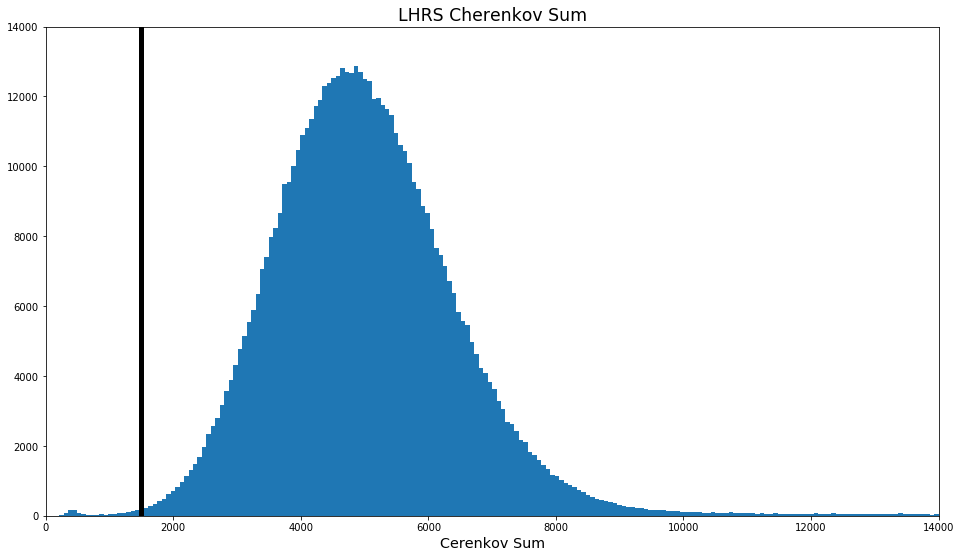

In [11]:
plt.figure(figsize=(16,9))
plt.hist(cerdata.Cherenkov,bins=200,range=[0,14000])
plt.gca().set(ylim=(0,14000),xlim=(0,14000))
plt.xlabel('Cerenkov Sum',fontsize='x-large')
plt.title("LHRS Cherenkov Sum", fontsize='xx-large')
plt.plot([1500,1500],[0,14000],'k-',lw=5)
plt.savefig("LCer_pid.pdf")

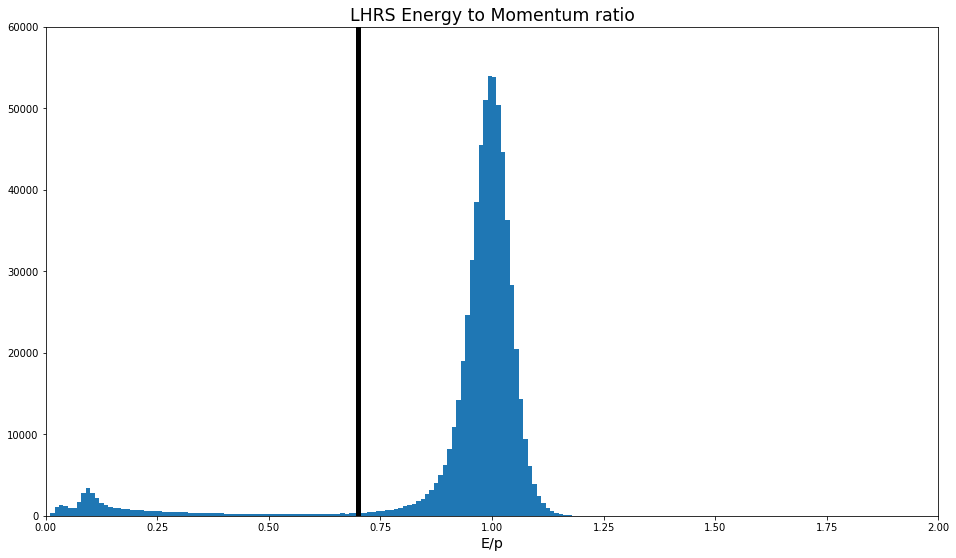

In [12]:
plt.figure(figsize=(16,9))
plt.hist((caldata.Preshower + caldata.Shower)/(1000*caldata.Momentum),bins=200,range=[0,2])
plt.gca().set(ylim=(0,60000),xlim=(0,2))
plt.xlabel('E/p',fontsize='x-large')
plt.title("LHRS Energy to Momentum ratio", fontsize='xx-large')
plt.plot([0.7,0.7],[0,60000],'k-',lw=5)
plt.savefig("LCal_pid.pdf")

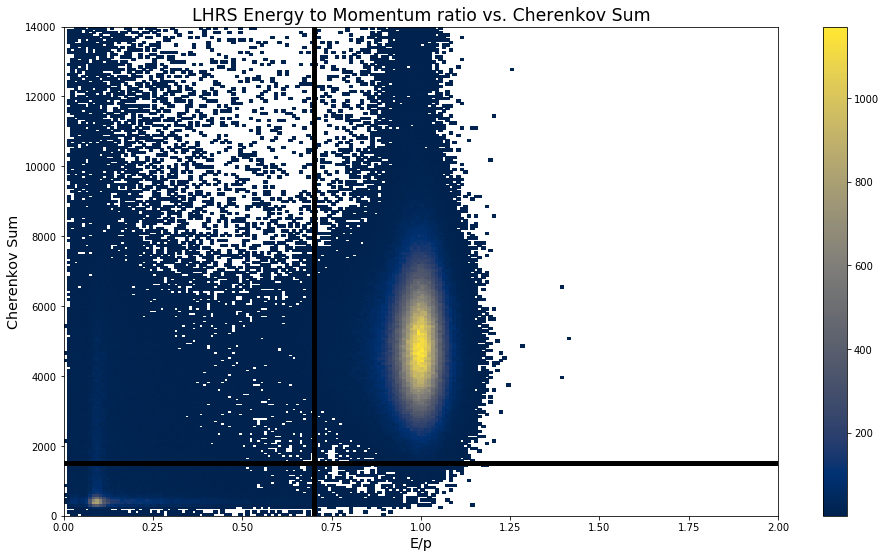

In [13]:
plt.figure(figsize=(16,9))
h = plt.hist2d((nopiddata.Preshower + nopiddata.Shower)/(1000*nopiddata.Momentum),nopiddata.Cherenkov,bins=200,range=[[0,2],[0,14000]],cmap='cividis',cmin=1)
plt.colorbar(h[3])
plt.gca().set(ylim=(0,14000),xlim=(0,2))
plt.xlabel('E/p',fontsize='x-large')
plt.ylabel("Cherenkov Sum",fontsize='x-large')
plt.title("LHRS Energy to Momentum ratio vs. Cherenkov Sum", fontsize='xx-large')
plt.plot([0.7,0.7],[0,14000],'k-',lw=5)
plt.plot([0,2],[1500,1500],'k-',lw=5)
plt.savefig("LCervCal_pid.pdf")